# Data Project - Stock Market Analysis 

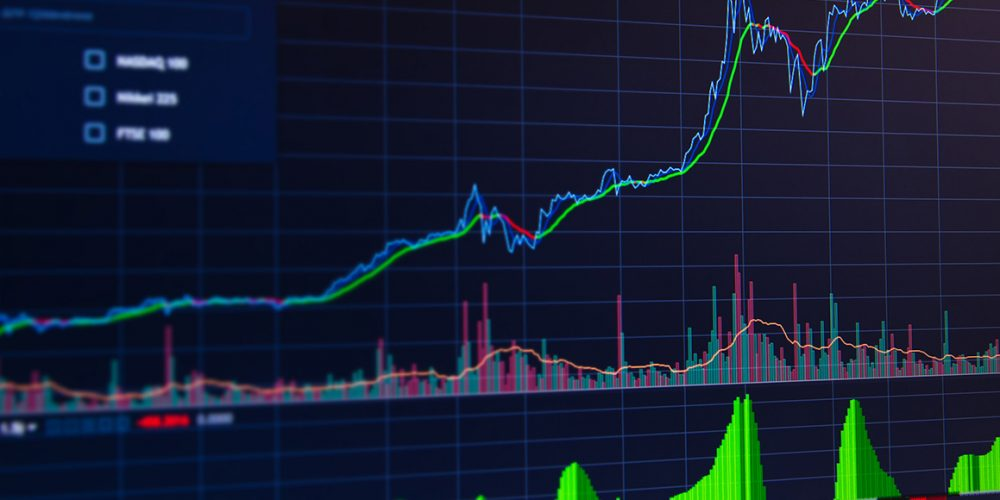

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [2]:
import yfinance as yf
from datetime import datetime

# Menentukan kode saham
stock_symbol = 'INCO.JK'

# Set up End and Start times for data grab
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

# Menggunakan yfinance untuk mengambil data dari Yahoo Finance
inco_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Menampilkan 10 baris terakhir dari data
print(inco_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2024-05-16  4560.0  4610.0  4470.0  4480.0     4480.0  14236600
2024-05-17  4570.0  4950.0  4540.0  4790.0     4790.0  59912300
2024-05-20  4890.0  5200.0  4890.0  5150.0     5150.0  97901000
2024-05-21  5150.0  5150.0  5000.0  5050.0     5050.0  32081400
2024-05-22  5050.0  5050.0  4850.0  4900.0     4900.0  19562900
2024-05-27  4870.0  4900.0  4720.0  4810.0     4810.0  29203400
2024-05-28  4810.0  5150.0  4810.0  5100.0     5100.0  26285300
2024-05-29  5100.0  5300.0  5050.0  5200.0     5200.0  22843000
2024-05-30  5150.0  5150.0  4970.0  4980.0     4980.0  12427600
2024-05-31  4980.0  5100.0  4910.0  4970.0     4970.0  12813700


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Setting up matplotlib and seaborn styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# Initialize company_list with specific data
company_list = [
    yf.download("ANTM.JK", start="2012-01-01", end=datetime.now()),
    yf.download("DKFT.JK", start="2012-01-01", end=datetime.now()),
    yf.download("KKGI.JK", start="2012-01-01", end=datetime.now()),
    yf.download("INCO.JK", start="2012-01-01", end=datetime.now())
]

# Add company names to each DataFrame
company_names = ["ANTM.JK", "DKFT.JK", "KKGI.JK", "INCO.JK"]

for df, com_name in zip(company_list, company_names):
    df["company_name"] = com_name

# Concatenate the data for all companies
df = pd.concat(company_list, axis=0)

# Extracting DataFrames for each company
antm_data = df[df['company_name'] == 'ANTM.JK']
dkft_data = df[df['company_name'] == 'DKFT.JK']
kkgi_data = df[df['company_name'] == 'KKGI.JK']
inco_data = df[df['company_name'] == 'INCO.JK']

# Display the tail of the concatenated DataFrame
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-16,4560.0,4610.0,4470.0,4480.0,4480.0,14236600,INCO.JK
2024-05-17,4570.0,4950.0,4540.0,4790.0,4790.0,59912300,INCO.JK
2024-05-20,4890.0,5200.0,4890.0,5150.0,5150.0,97901000,INCO.JK
2024-05-21,5150.0,5150.0,5000.0,5050.0,5050.0,32081400,INCO.JK
2024-05-22,5050.0,5050.0,4850.0,4900.0,4900.0,19562900,INCO.JK
2024-05-27,4870.0,4900.0,4720.0,4810.0,4810.0,29203400,INCO.JK
2024-05-28,4810.0,5150.0,4810.0,5100.0,5100.0,26285300,INCO.JK
2024-05-29,5100.0,5300.0,5050.0,5200.0,5200.0,22843000,INCO.JK
2024-05-30,5150.0,5150.0,4970.0,4980.0,4980.0,12427600,INCO.JK


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [4]:
dkft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3.064000e+03
mean,279.799608,283.786554,275.554178,279.526110,267.168026,1.116101e+07
std,131.047747,131.648059,130.250357,131.279626,121.848199,3.913995e+07
min,65.000000,74.000000,65.000000,69.000000,69.000000,0.000000e+00
25%,134.000000,137.000000,131.000000,133.000000,133.000000,1.500000e+05
50%,320.000000,325.000000,312.000000,320.000000,270.000000,1.795300e+06
75%,397.000000,397.000000,397.000000,397.000000,397.000000,8.070450e+06
max,630.000000,660.000000,620.000000,630.000000,504.766998,8.863214e+08


In [5]:
kkgi_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3.064000e+03
mean,360.400521,368.280105,352.687412,359.996794,293.893427,2.049830e+06
std,228.108302,232.647440,224.570945,228.017455,165.998777,4.201608e+06
min,73.359070,74.324326,71.428574,74.324326,59.229252,0.000000e+00
25%,220.077225,225.868729,212.355209,218.146713,179.695190,1.039885e+05
50%,326.254822,333.976837,318.532806,324.324310,259.359741,6.190100e+05
75%,419.884155,430.501923,415.057922,419.884155,362.040947,2.121262e+06
max,1640.926636,1640.926636,1602.316650,1640.926636,1118.967896,7.257087e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [6]:
inco_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3.063000e+03
mean,3672.678746,3732.569376,3605.297094,3664.872674,3567.238822,1.387592e+07
std,1478.919120,1498.561522,1451.458205,1475.101714,1483.666651,1.529819e+07
min,1285.000000,1345.000000,1190.000000,1250.000000,1221.845459,0.000000e+00
25%,2620.000000,2675.000000,2570.000000,2620.000000,2476.524292,5.664200e+06
50%,3350.000000,3375.000000,3285.000000,3335.000000,3206.122803,9.717000e+06
75%,4405.000000,4465.000000,4320.000000,4375.000000,4310.000000,1.703660e+07
max,8700.000000,8800.000000,8400.000000,8675.000000,8558.988281,2.561385e+08


In [7]:
# General info
antm_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3064 entries, 2012-01-02 to 2024-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3064 non-null   float64
 1   High          3064 non-null   float64
 2   Low           3064 non-null   float64
 3   Close         3064 non-null   float64
 4   Adj Close     3064 non-null   float64
 5   Volume        3064 non-null   int64  
 6   company_name  3064 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 191.5+ KB


In [8]:
dkft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3064 entries, 2012-01-02 to 2024-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3064 non-null   float64
 1   High          3064 non-null   float64
 2   Low           3064 non-null   float64
 3   Close         3064 non-null   float64
 4   Adj Close     3064 non-null   float64
 5   Volume        3064 non-null   int64  
 6   company_name  3064 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 191.5+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

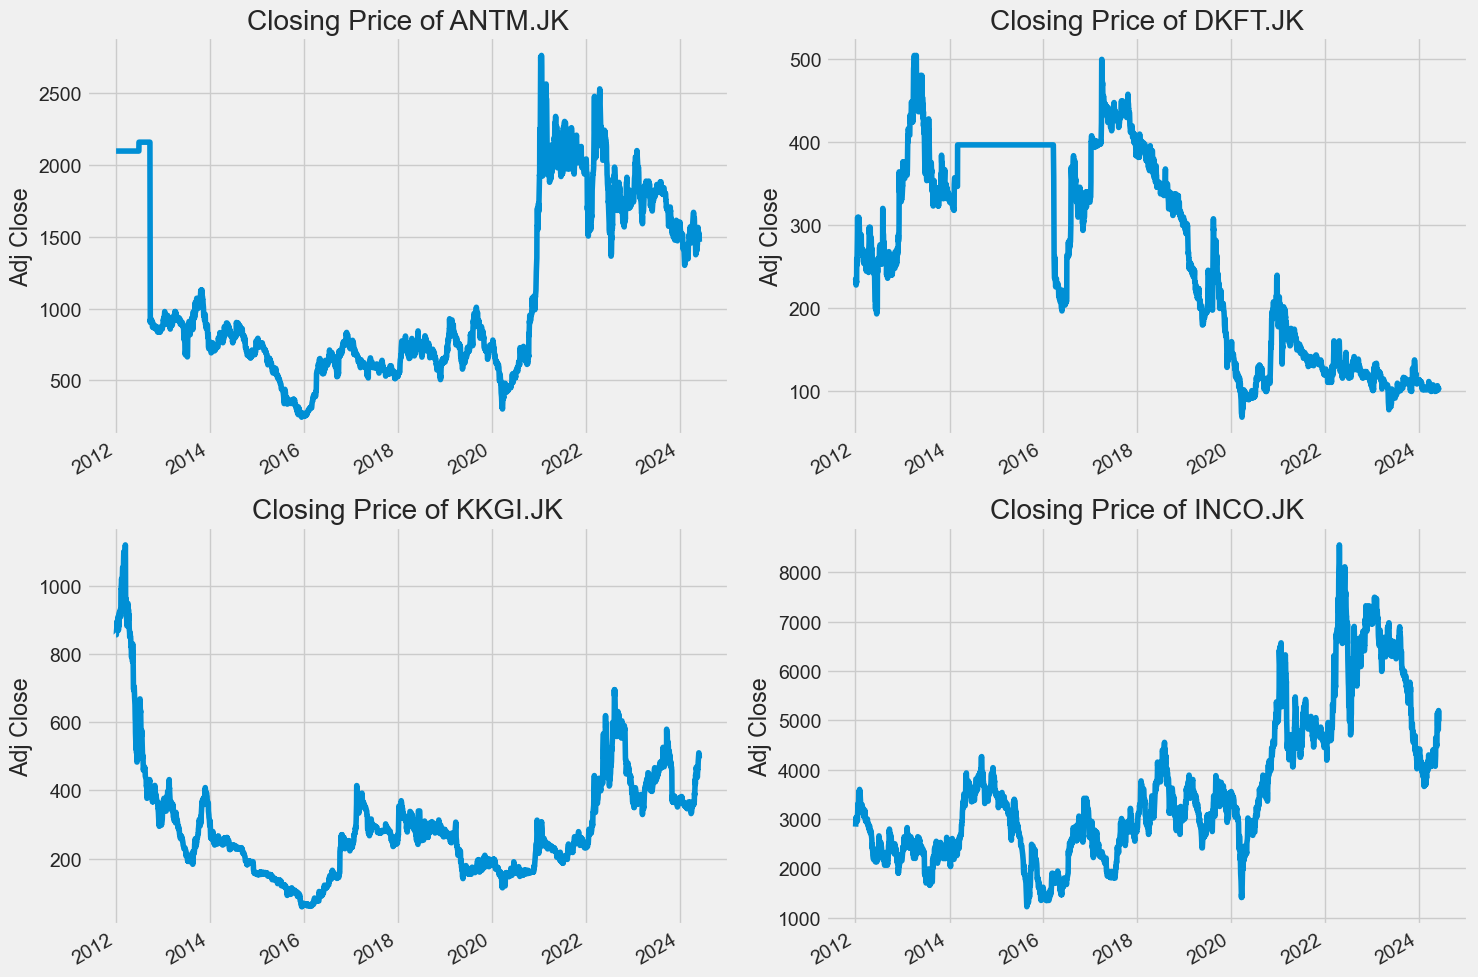

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

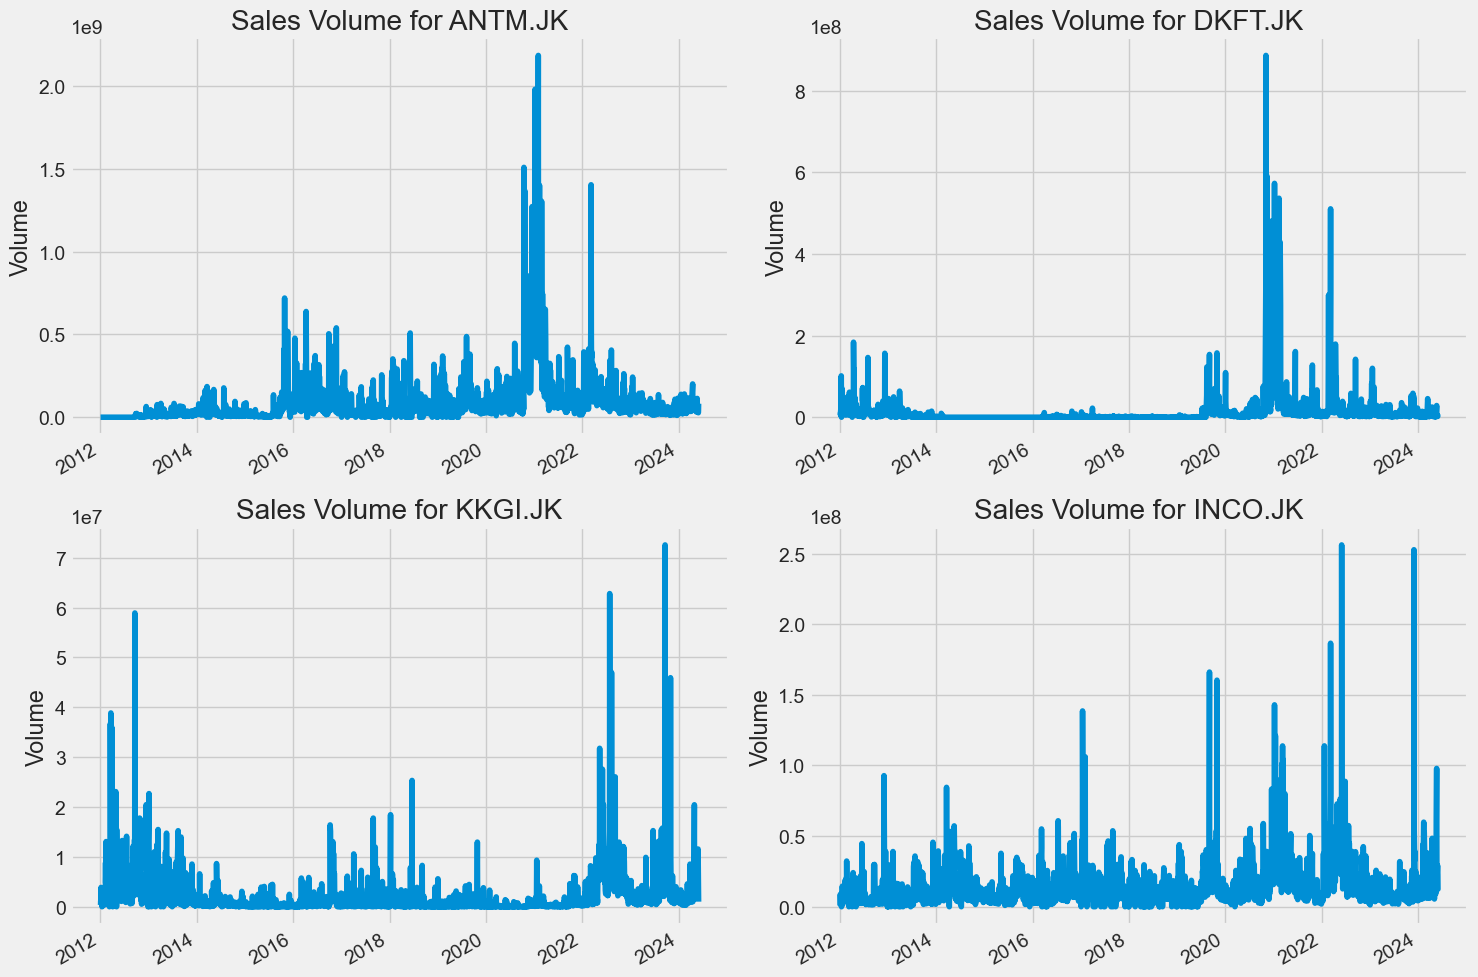

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to

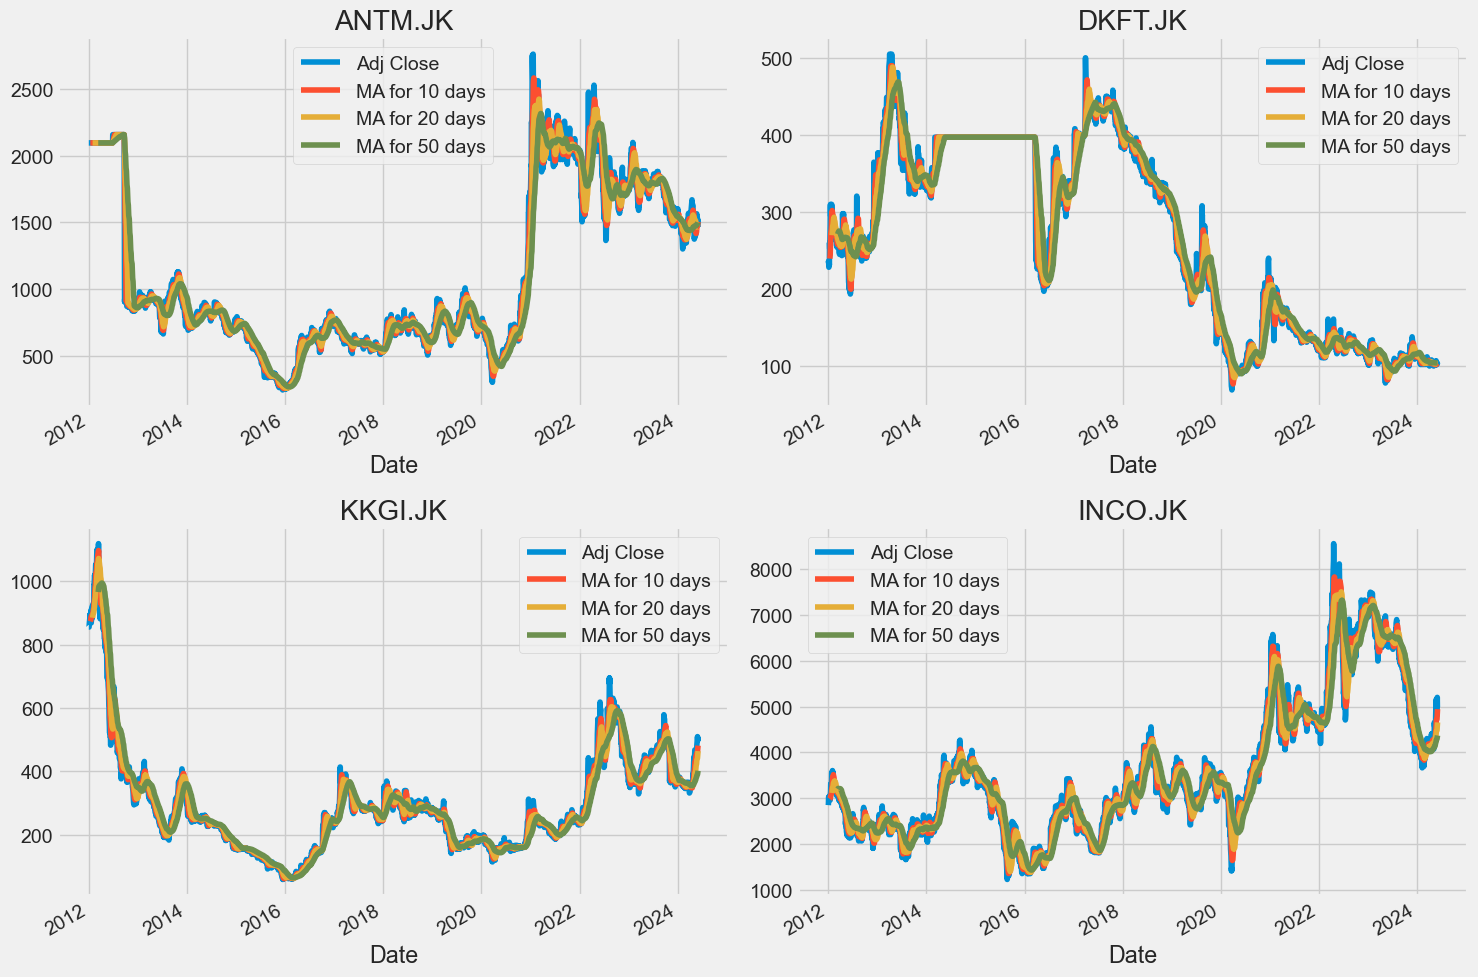

In [11]:
# Define the company_list or use the company_data dictionary created earlier
company_list = [antm_data, dkft_data, kkgi_data, inco_data]

# Define the moving averages
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for ANTM.JK
antm_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ANTM.JK')

# Plot for DKFT.JK
dkft_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('DKFT.JK')

# Plot for KKGI.JK
kkgi_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('KKGI.JK')

# Plot for INCO.JK
inco_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('INCO.JK')

# Adjust layout
fig.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/3693471802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily Return'] = company_data['Adj Close'].pct_change()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/3693471802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily Return'] = company_data['Adj Close'].pct_change()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/3693471802.py:3: SettingWithCopyWarning: 
A value i

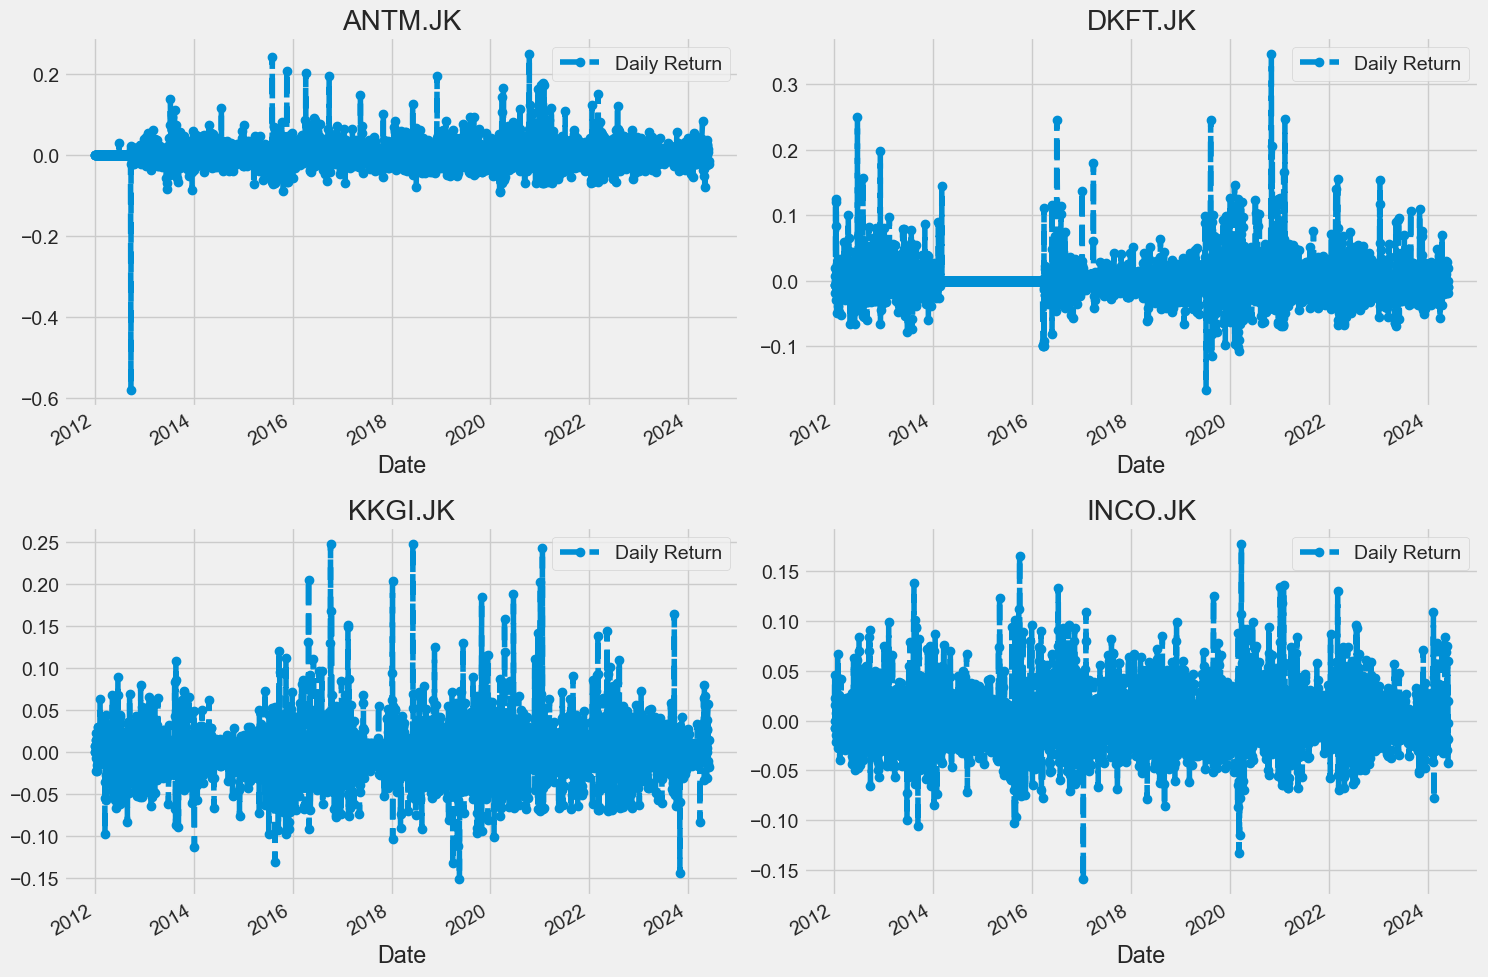

In [12]:
# Assuming you have calculated 'Daily Return' for each company in company_list
for company_data, company_name in zip([antm_data, dkft_data, kkgi_data, inco_data], ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']):
    company_data['Daily Return'] = company_data['Adj Close'].pct_change()

# Now, plot the daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

antm_data['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('ANTM.JK')

dkft_data['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('DKFT.JK')

kkgi_data['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('KKGI.JK')

inco_data['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('INCO.JK')

fig.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

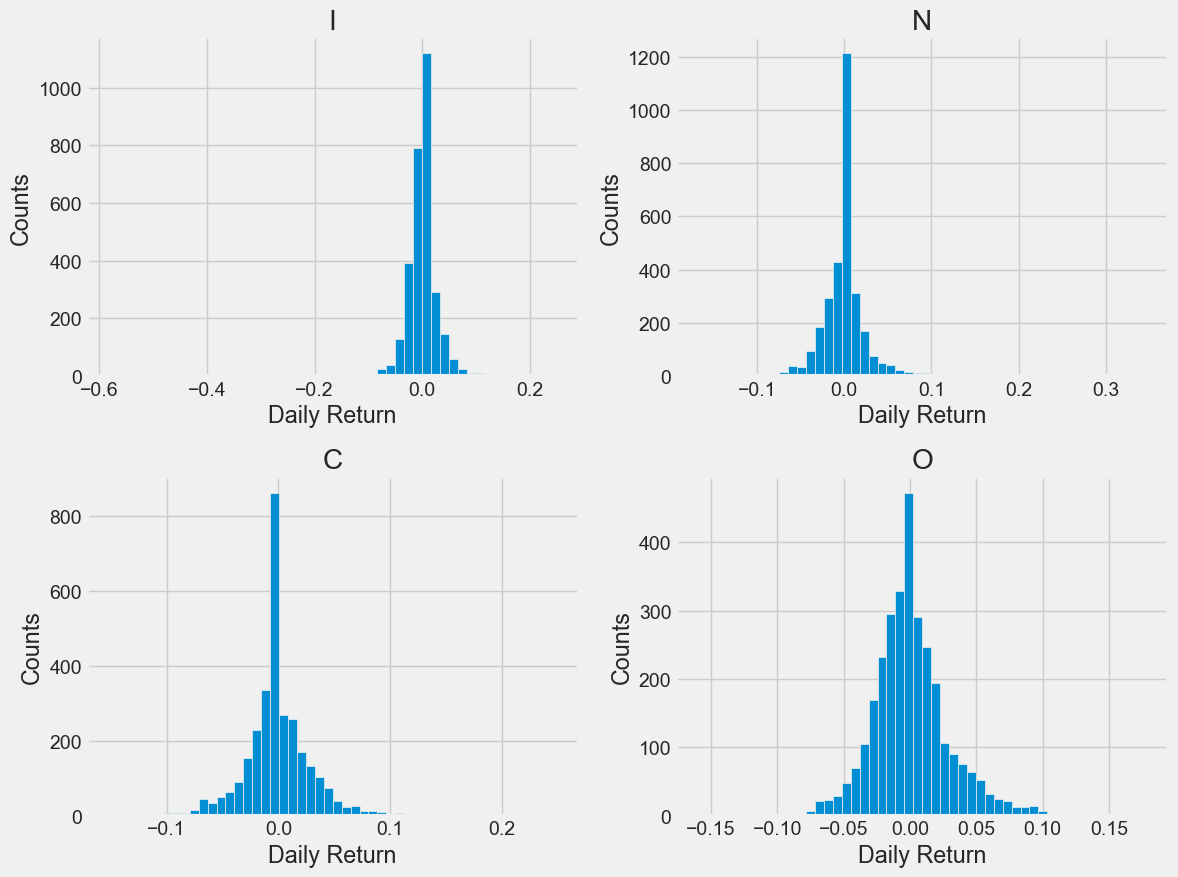

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Specify the company names
company_names = ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']

# Create an empty DataFrame to store closing prices
closing_df = yf.download(company_names, start=start, end=end)['Adj Close']

# Create a new DataFrame for returns
returns_df = closing_df.pct_change()
returns_df.head()


[*********************100%%**********************]  4 of 4 completed


Ticker,ANTM.JK,DKFT.JK,INCO.JK,KKGI.JK
Date,,,,
2023-06-05,NaN,NaN,NaN,NaN
2023-06-06,0.017722,0.010309,0.000000,0.026316
2023-06-07,0.004975,-0.010204,0.000000,-0.017094
2023-06-08,-0.017327,-0.010309,-0.018939,0.017391
2023-06-09,-0.005038,0.020833,-0.019305,0.017094


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

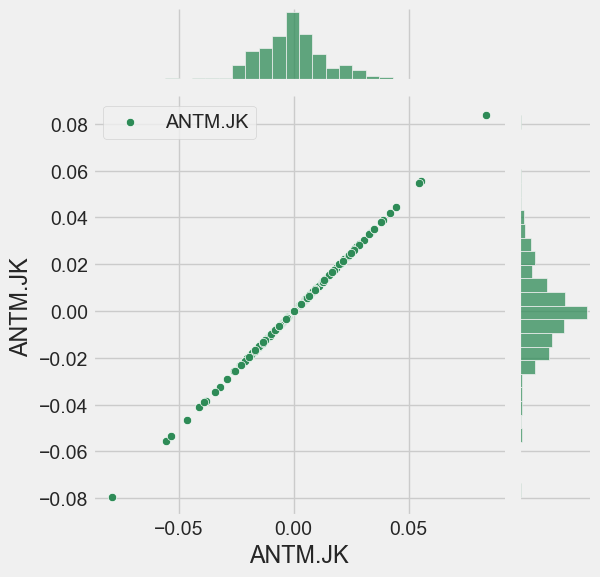

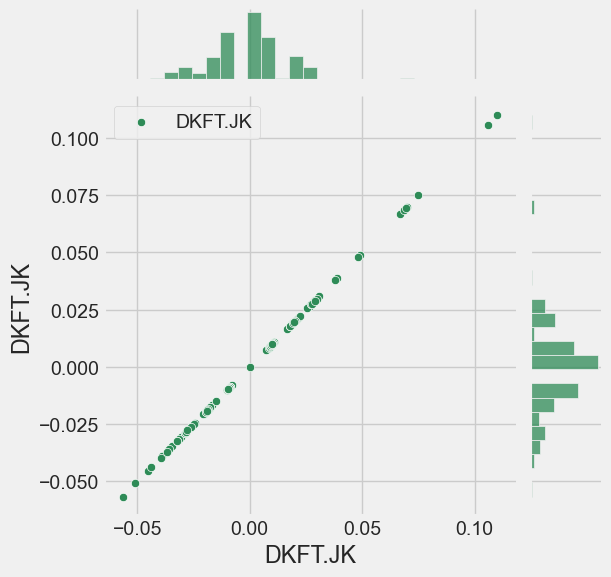

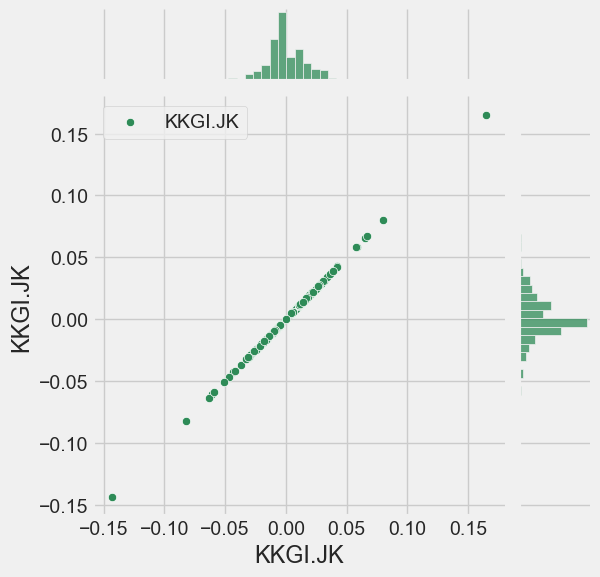

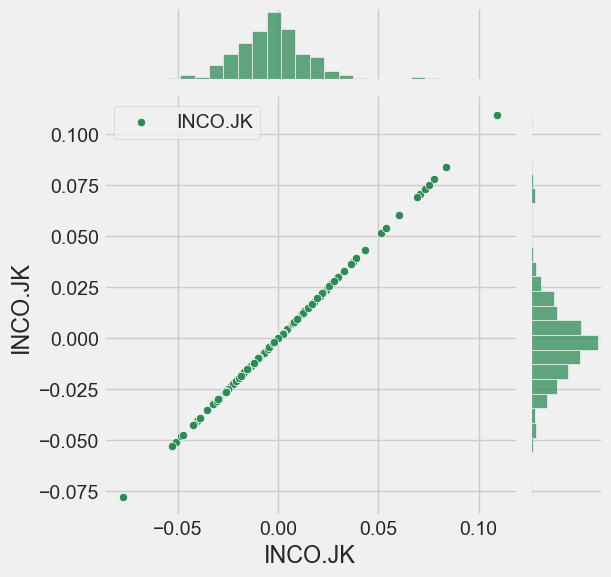

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the company names
company_names = ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']

# Plotting the jointplot for each company against itself
for company_name in company_names:
    sns.jointplot(x=company_name, y=company_name, data=returns_df, kind='scatter', color='seagreen', label=company_name)

plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


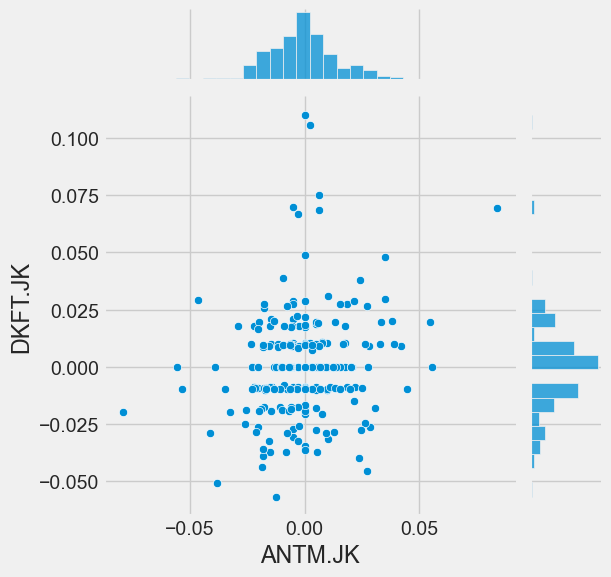

In [16]:
# We'll use joinplot to compare the daily returns of ANTM.JK and DKFT.JK
sns.jointplot(x='ANTM.JK', y='DKFT.JK', data=returns_df, kind='scatter')

plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

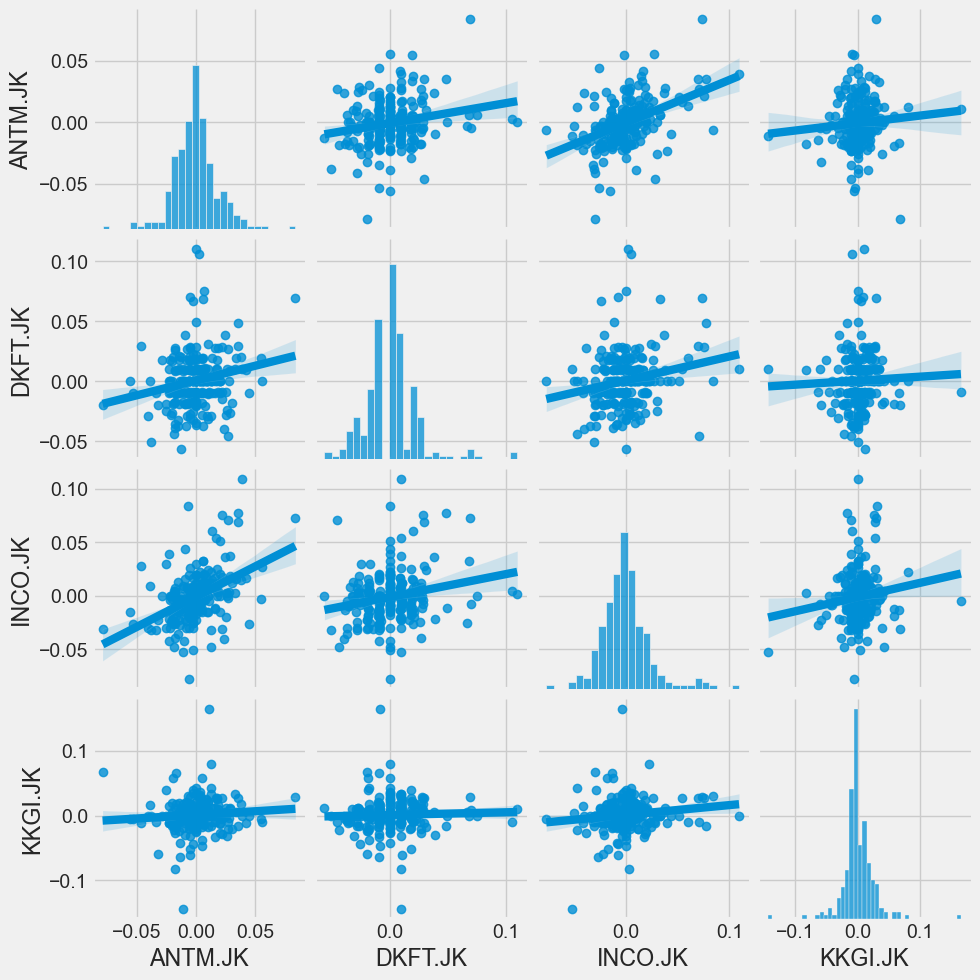

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(returns_df, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

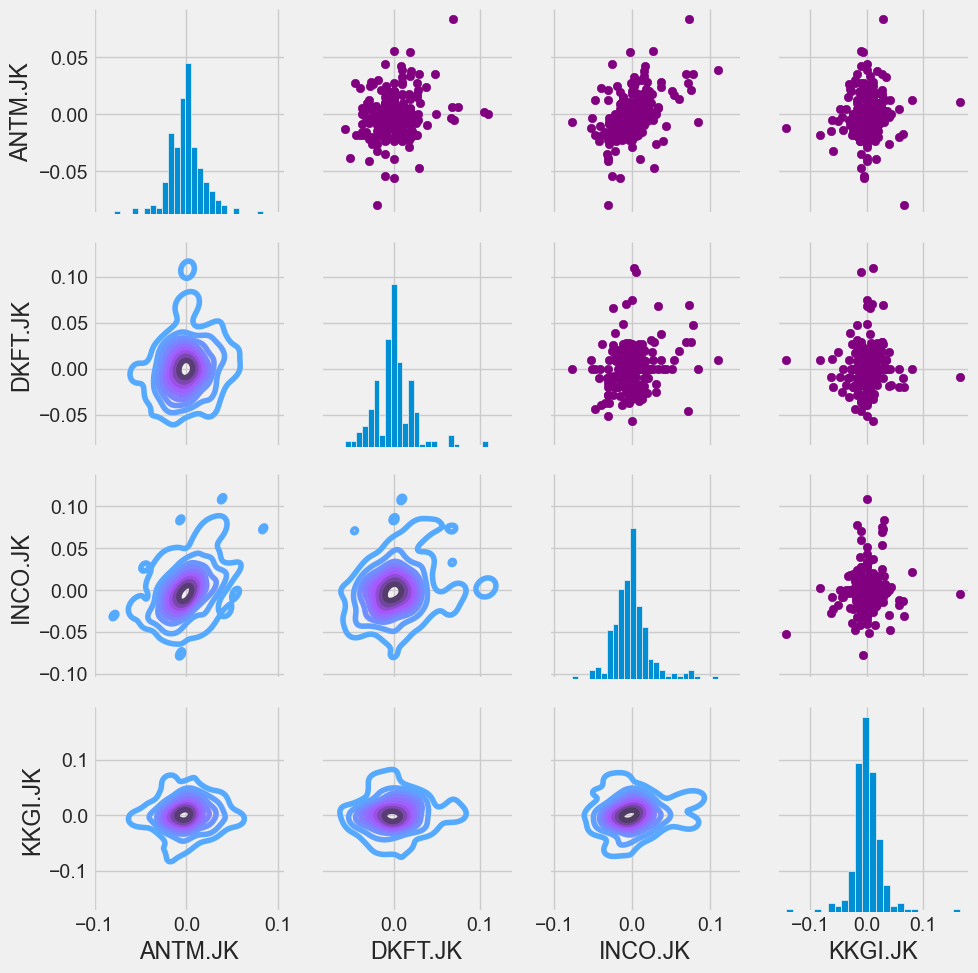

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(returns_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=25)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

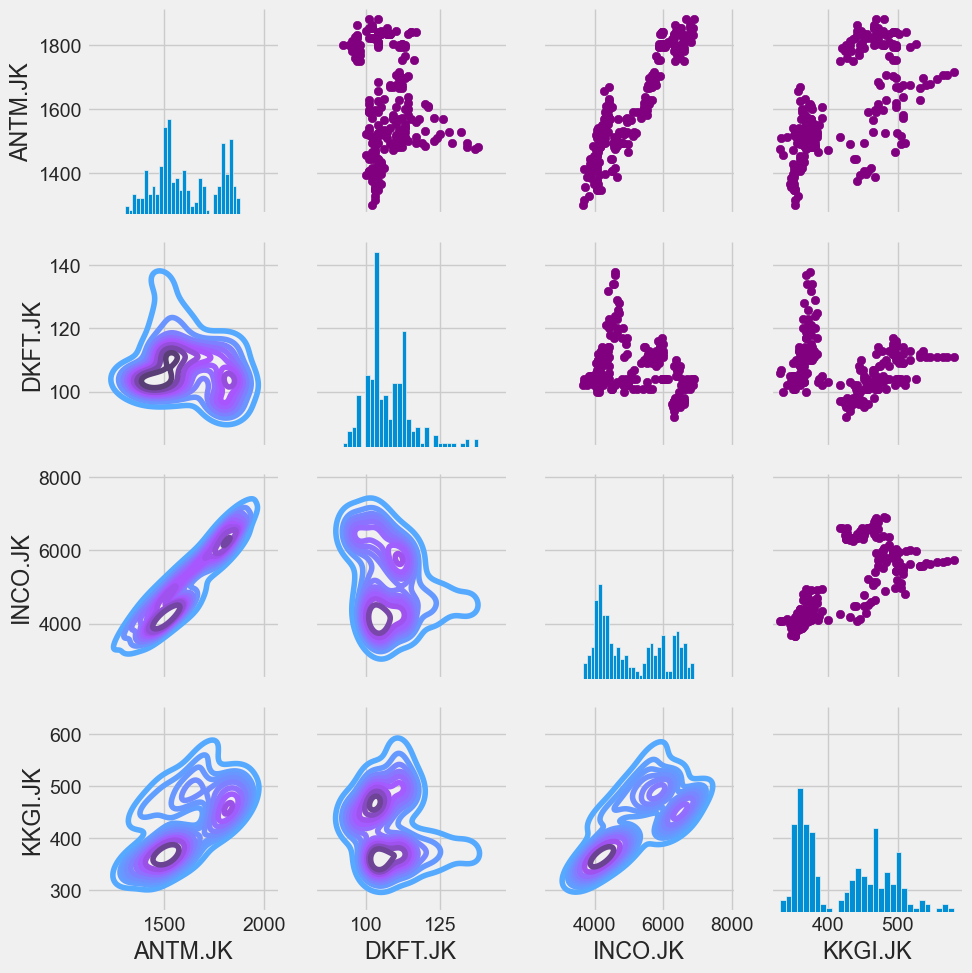

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

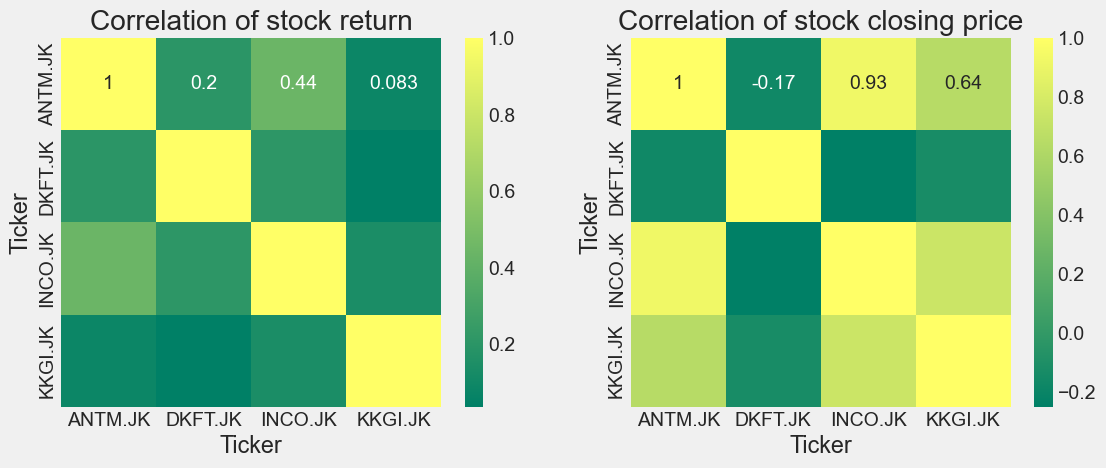

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(returns_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

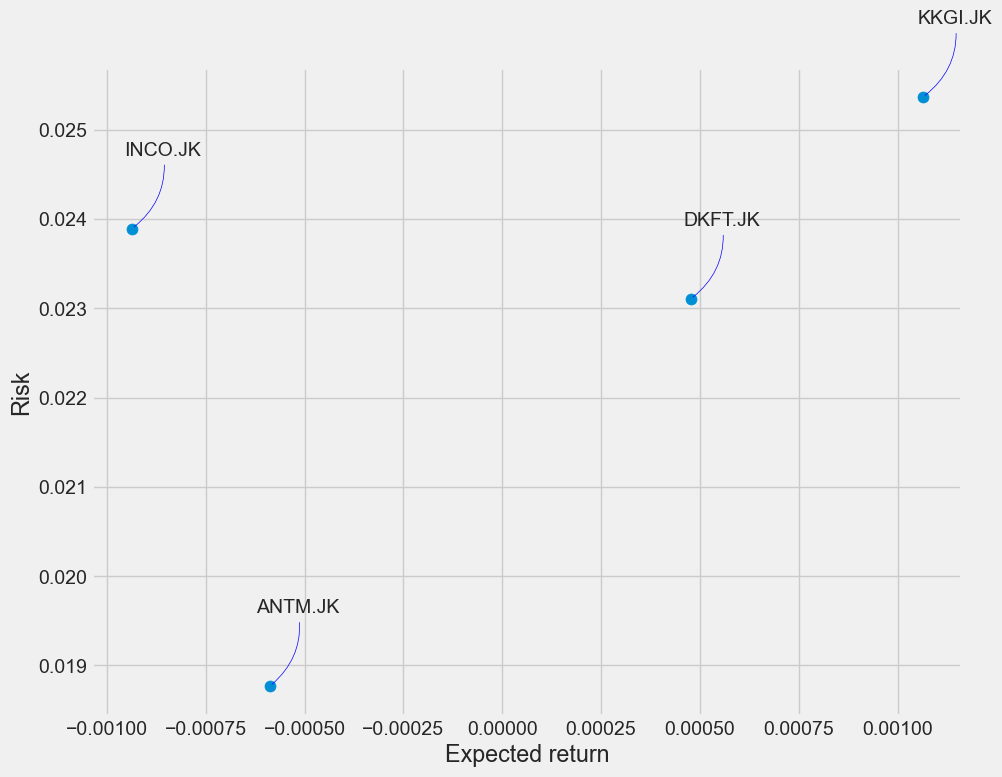

In [21]:
rets = returns_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [23]:

# download the data
df = yf.download('KKGI.JK', start='2021-01-01', end=datetime.now())

y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)



[*********************100%%**********************]  1 of 1 completed
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_81011/4171940205.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Close'].fillna(method='ffill')


In [24]:
# Save the forecast results to CSV
df.to_csv('KKGI.JK.csv')

In [25]:
df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  256.756744  308.880310  245.173752  308.880310  259.313843   
2021-01-05  308.880310  308.880310  287.644775  301.158295  252.830994   
2021-01-06  299.227814  301.158295  281.853271  295.366791  247.968887   
2021-01-07  281.853271  299.227814  277.992279  295.366791  247.968887   
2021-01-08  293.436279  293.436279  276.061768  276.061768  231.761749   
...                ...         ...         ...         ...         ...   
2024-05-27  484.000000  520.000000  482.000000  510.000000  510.000000   
2024-05-28  510.000000  530.000000  500.000000  505.000000  505.000000   
2024-05-29  505.000000  510.000000  480.000000  498.000000  498.000000   
2024-05-30  498.000000  510.000000  490.000000  505.000000  505.000000   
2024-05-31  505.000000  515.000000  496.000000  496.000000  496.000000   

       

In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,824.000000,824.000000,824.000000,824.000000,824.000000,8.240000e+02
mean,398.119654,407.185979,388.569114,397.327126,372.253972,3.411583e+06
std,114.290596,117.836390,110.456638,113.893915,117.784741,5.700996e+06
min,222.007721,223.938217,220.077225,222.007721,186.381821,4.351000e+03
25%,289.575287,299.227814,279.922791,289.575287,249.344269,5.600098e+05
50%,382.239380,389.961395,376.223938,382.239380,372.130234,1.585598e+06
75%,474.903473,487.451752,465.250977,473.455589,456.545868,4.191267e+06
max,738.416992,752.895752,709.459473,733.590759,695.061829,7.257087e+07


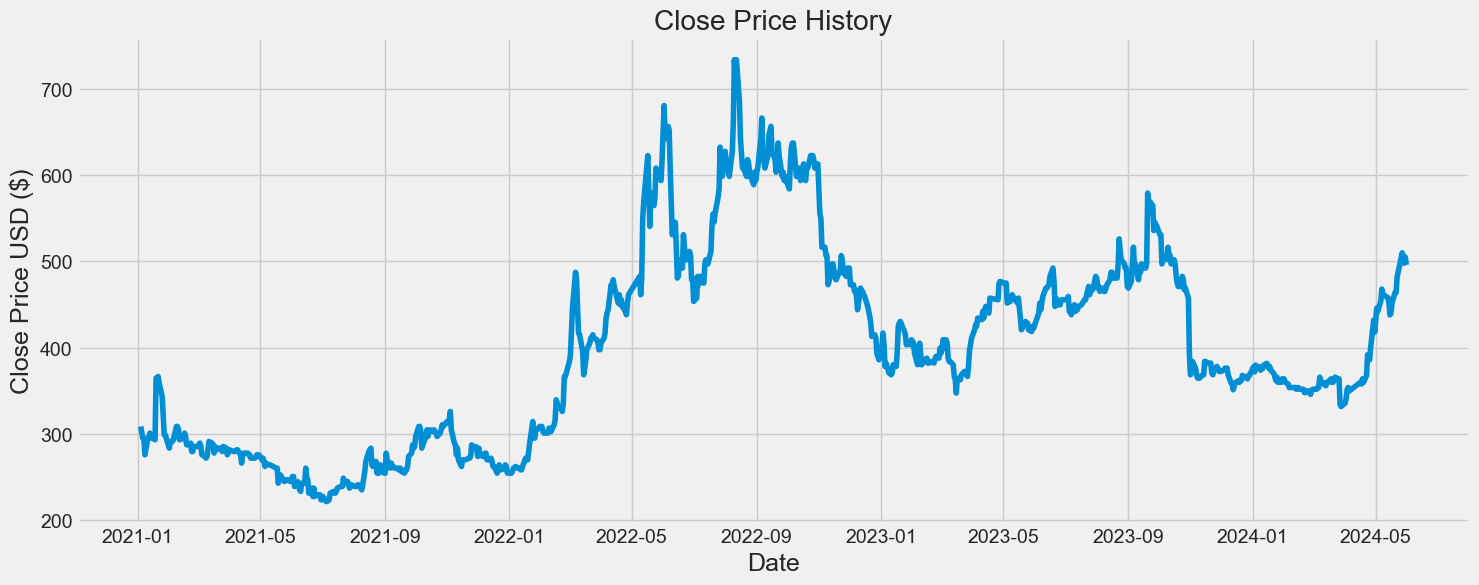

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Asumsi y adalah data deret waktu Anda dan df berisi harga 'Close'
y = df['Close'].values.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Mempersiapkan urutan input dan output
n_lookback = 182  # panjang urutan input (periode melihat ke belakang)
n_forecast = 365  # panjang urutan output (periode perkiraan)

X = []
Y = []

for i in range(n_lookback, len(y_scaled) - n_forecast + 1):
    X.append(y_scaled[i - n_lookback: i])
    Y.append(y_scaled[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# Membagi data menjadi set pelatihan dan set uji (misalnya, 80% pelatihan, 20% uji)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Melatih model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')

eval_data = []

# Iterasi melalui setiap epoch untuk mendapatkan hasil evaluasi
for epoch in range(0, 3):  # Mulai dari 1 karena iterasi ke-0 tidak masuk akal
    model.fit(X_train, Y_train, epochs=epoch, batch_size=3, verbose=0)

    # Menghasilkan perkiraan pada set uji
    Y_test_pred = model.predict(X_test)

    # Mengembalikan skala prediksi ke skala asli
    Y_test_pred_rescaled = scaler.inverse_transform(Y_test_pred.reshape(-1, 1)).reshape(Y_test_pred.shape)
    Y_test_rescaled = scaler.inverse_transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)

    # Menghitung metrik pada set uji
    rmse = np.sqrt(mean_squared_error(Y_test_rescaled.flatten(), Y_test_pred_rescaled.flatten()))
    mae = mean_absolute_error(Y_test_rescaled.flatten(), Y_test_pred_rescaled.flatten())
    mse = mean_squared_error(Y_test_rescaled.flatten(), Y_test_pred_rescaled.flatten())
    mape = np.mean(np.abs((Y_test_rescaled.flatten() - Y_test_pred_rescaled.flatten()) / Y_test_rescaled.flatten())) * 100

    # Menambahkan hasil evaluasi ke list
    eval_data.append({
        'Epochs': epoch,
        'Optimizer': 'adam',
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'MAPE': mape
    })

# Menghasilkan prediksi untuk periode masa depan
last_sequence = y_scaled[-n_lookback:].reshape(1, n_lookback, 1)
Y_ = model.predict(last_sequence)
Y_ = scaler.inverse_transform(Y_.flatten().reshape(-1, 1)).flatten()





1/1 [==============================] - 0s 23ms/step


In [ ]:
X_train

array([[[0.16981132],
        [0.15471696],
        [0.14339621],
        ...,
        [0.10943396],
        [0.12830186],
        [0.12075471]],

       [[0.15471696],
        [0.14339621],
        [0.14339621],
        ...,
        [0.12830186],
        [0.12075471],
        [0.12452831]],

       [[0.14339621],
        [0.14339621],
        [0.10566036],
        ...,
        [0.12075471],
        [0.12452831],
        [0.14716982]],

       ...,

       [[0.09433961],
        [0.09433961],
        [0.09433961],
        ...,
        [0.90566033],
        [0.82075471],
        [0.75471691]],

       [[0.09433961],
        [0.09433961],
        [0.09811321],
        ...,
        [0.82075471],
        [0.75471691],
        [0.75471691]],

       [[0.09433961],
        [0.09811321],
        [0.09811321],
        ...,
        [0.75471691],
        [0.75471691],
        [0.73584908]]])

In [ ]:
X_train

array([[[0.16981132],
        [0.15471696],
        [0.14339621],
        ...,
        [0.10943396],
        [0.12830186],
        [0.12075471]],

       [[0.15471696],
        [0.14339621],
        [0.14339621],
        ...,
        [0.12830186],
        [0.12075471],
        [0.12452831]],

       [[0.14339621],
        [0.14339621],
        [0.10566036],
        ...,
        [0.12075471],
        [0.12452831],
        [0.14716982]],

       ...,

       [[0.09433961],
        [0.09433961],
        [0.09433961],
        ...,
        [0.90566033],
        [0.82075471],
        [0.75471691]],

       [[0.09433961],
        [0.09433961],
        [0.09811321],
        ...,
        [0.82075471],
        [0.75471691],
        [0.75471691]],

       [[0.09433961],
        [0.09811321],
        [0.09811321],
        ...,
        [0.75471691],
        [0.75471691],
        [0.73584908]]])

In [ ]:
Y_test

array([[[0.76415095],
        [0.745283  ],
        [0.73584908],
        ...,
        [0.2540981 ],
        [0.2540981 ],
        [0.2540981 ]],

       [[0.745283  ],
        [0.73584908],
        [0.71698112],
        ...,
        [0.2540981 ],
        [0.2540981 ],
        [0.24627923]],

       [[0.73584908],
        [0.71698112],
        [0.745283  ],
        ...,
        [0.2540981 ],
        [0.24627923],
        [0.24627923]],

       ...,

       [[0.57547162],
        [0.57547162],
        [0.55660372],
        ...,
        [0.42611319],
        [0.44956979],
        [0.47302639]],

       [[0.57547162],
        [0.55660372],
        [0.55660372],
        ...,
        [0.44956979],
        [0.47302639],
        [0.47302639]],

       [[0.55660372],
        [0.55660372],
        [0.49056599],
        ...,
        [0.47302639],
        [0.47302639],
        [0.5082113 ]]])

In [ ]:
Y_train

array([[[0.12452831],
        [0.14716982],
        [0.16981132],
        ...,
        [0.27547167],
        [0.24528303],
        [0.27924528]],

       [[0.14716982],
        [0.16981132],
        [0.16981132],
        ...,
        [0.24528303],
        [0.27924528],
        [0.27547167]],

       [[0.16981132],
        [0.16981132],
        [0.15849057],
        ...,
        [0.27924528],
        [0.27547167],
        [0.28679242]],

       ...,

       [[0.75471691],
        [0.73584908],
        [0.77358487],
        ...,
        [0.25800754],
        [0.2540981 ],
        [0.25800754]],

       [[0.73584908],
        [0.77358487],
        [0.76415095],
        ...,
        [0.2540981 ],
        [0.25800754],
        [0.2540981 ]],

       [[0.77358487],
        [0.76415095],
        [0.745283  ],
        ...,
        [0.25800754],
        [0.2540981 ],
        [0.2540981 ]]])

In [ ]:
# Mengatur hasil dalam bentuk data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_
df_future['Actual'] = np.nan

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_60415/3681133671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]


In [ ]:
# Menggabungkan data frame masa lalu dan masa depan
results = pd.concat([df_past, df_future]).set_index('Date')

# Hitung nilai mean dari kolom 'Actual' dalam data frame df_past
mean_value = df_past['Actual'].mean()

# Membuat kolom baru untuk karakteristik 'high' dan 'low' berdasarkan nilai mean
results['Characteristic'] = np.where(results['Actual'].fillna(results['Forecast']) >= mean_value, 'high', 'low')

# Menampilkan hasil
print(results)




                Actual    Forecast Characteristic
Date                                             
2019-05-22  184.362930         NaN            low
2019-05-23  185.328186         NaN            low
2019-05-24  185.328186         NaN            low
2019-05-27  189.189194         NaN            low
2019-05-28  202.702698         NaN            low
...                ...         ...            ...
2025-05-18         NaN  533.112183           high
2025-05-19         NaN  563.474426           high
2025-05-20         NaN  547.844238           high
2025-05-21         NaN  547.302917           high
2025-05-22         NaN  549.545166           high

[1583 rows x 3 columns]


In [ ]:
# Menampilkan metrik evaluasi
eval_df = pd.DataFrame(eval_data)
print(eval_df)

   Epochs Optimizer        RMSE         MAE            MSE       MAPE
0       0      adam  334.448562  324.091087  111855.840428  69.228209
1       1      adam  125.224001  100.473306   15681.050322  22.609494
2       2      adam  119.207098   96.547181   14210.332158  21.899372


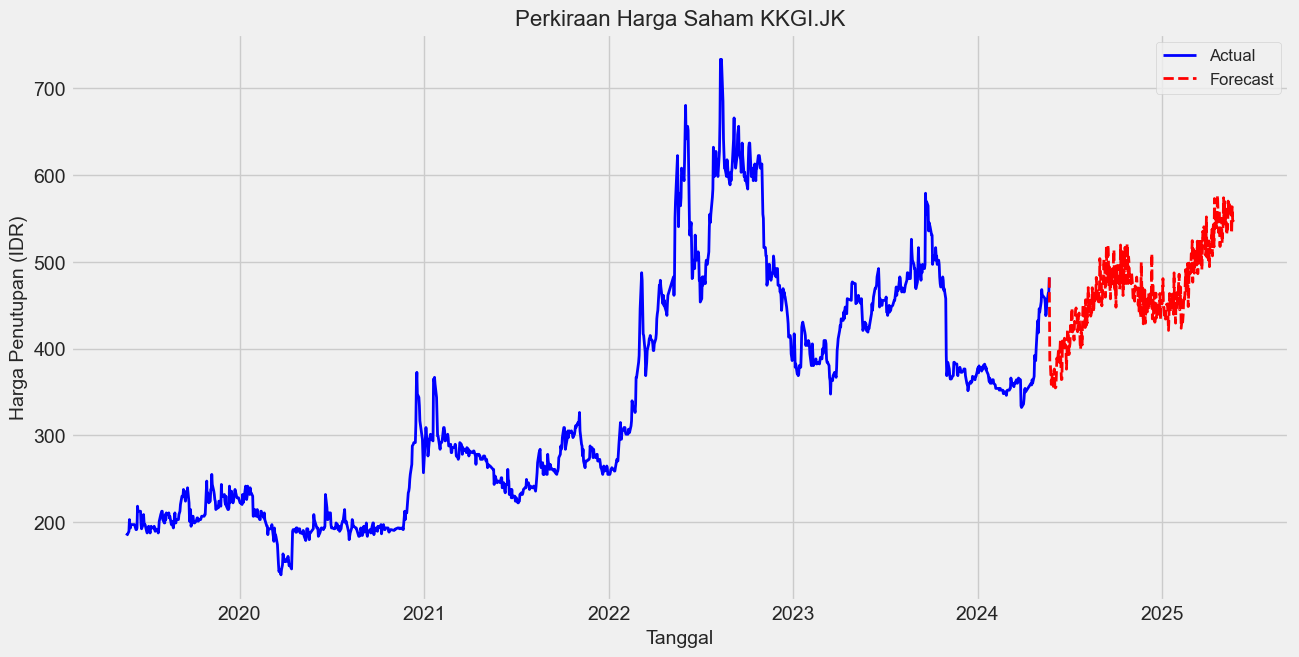

In [ ]:
# Membuat plot hasil
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(results.index, results['Forecast'], label='Forecast', color='red', linestyle='--', linewidth=2)
plt.title('Perkiraan Harga Saham KKGI.JK', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Harga Penutupan (IDR)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
eval_df

,Epochs,Optimizer,RMSE,MAE,MSE,MAPE
0,0,adam,334.448562,324.091087,111855.840428,69.228209
1,1,adam,125.224001,100.473306,15681.050322,22.609494
2,2,adam,119.207098,96.547181,14210.332158,21.899372


In [ ]:
results

,Actual,Forecast,Characteristic
Date,,,
2019-05-22,184.362930,NaN,low
2019-05-23,185.328186,NaN,low
2019-05-24,185.328186,NaN,low
2019-05-27,189.189194,NaN,low
2019-05-28,202.702698,NaN,low
...,...,...,...
2025-05-18,NaN,533.112183,high
2025-05-19,NaN,563.474426,high
2025-05-20,NaN,547.844238,high


In [ ]:
# Save the forecast results to CSV
results.to_csv('forecast_results.csv')

In [ ]:
# Save the forecast results to CSV
eval_df.to_csv('forecast_evaluasi.csv')